<a href="https://colab.research.google.com/github/kunwarsharik/SharikProjects/blob/master/Combinatorial_optimization_PuLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pulp

     |████████████████████████████████| 41.2 MB 73 kB/s 


In [4]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

In [2]:
obj=[-1,-2]#cofficient of x and y multiplied by -1 to get minimum -z i.e maximum +z
lhs_ineq=[[2,1],[-4,5],[-1,2]] # coff of x,y in inequalities.
rhs_ineq=[20,10,-2]
lhs_eq=[[-1,5]] # above are inequalities, equalities are given seperately 
rhs_eq=[15]#right side

In [3]:
bnd=[(0,float("inf")),(0,float("inf"))] # x,y bounds

In [5]:
model=LpProblem(name="small-problem",sense=LpMaximize)

In [6]:
x= LpVariable(name="x",lowBound=0)
y= LpVariable(name="y",lowBound=0)

In [8]:
model+=(2*x+y<=20,"constraint1")
model+=(4*x-5*y>=-10,"constraint2")
model+=(-x+2*y>=-2,"constraint3")
model+=(-x+5*y==15,"constraint4")

In [9]:
obj_func = x + 2 * y
model += obj_func

In [10]:
model

small-problem:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
constraint1: 2 x + y <= 20

constraint2: 4 x - 5 y >= -10

constraint3: - x + 2 y >= -2

constraint4: - x + 5 y = 15

VARIABLES
x Continuous
y Continuous

In [11]:
status = model.solve()

In [13]:
model.objective.value()

16.8181817

In [14]:
for var in model.variables():
    print(f"{var.name}: {var.value()}")

x: 7.7272727
y: 4.5454545


In [1]:
!wget https://github.com/kunwarsharik/Website/raw/master/OR_graph.png
!wget https://github.com/kunwarsharik/Website/raw/master/OR_graph2.png

--2021-09-06 08:58:19--  https://github.com/kunwarsharik/Website/raw/master/OR_graph.png
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kunwarsharik/Website/master/OR_graph.png [following]
--2021-09-06 08:58:19--  https://raw.githubusercontent.com/kunwarsharik/Website/master/OR_graph.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46208 (45K) [image/png]
Saving to: ‘OR_graph.png’

OR_graph.png        100%[===================>]  45.12K  --.-KB/s    in 0.009s  

2021-09-06 08:58:20 (4.72 MB/s) - ‘OR_graph.png’ saved [46208/46208]

--2021-09-06 08:58:20--  https://github.com/kunwarsharik/Websi

In [4]:
import matplotlib.pyplot as plt

In [5]:
def display_image_in_actual_size(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')
    plt.show()

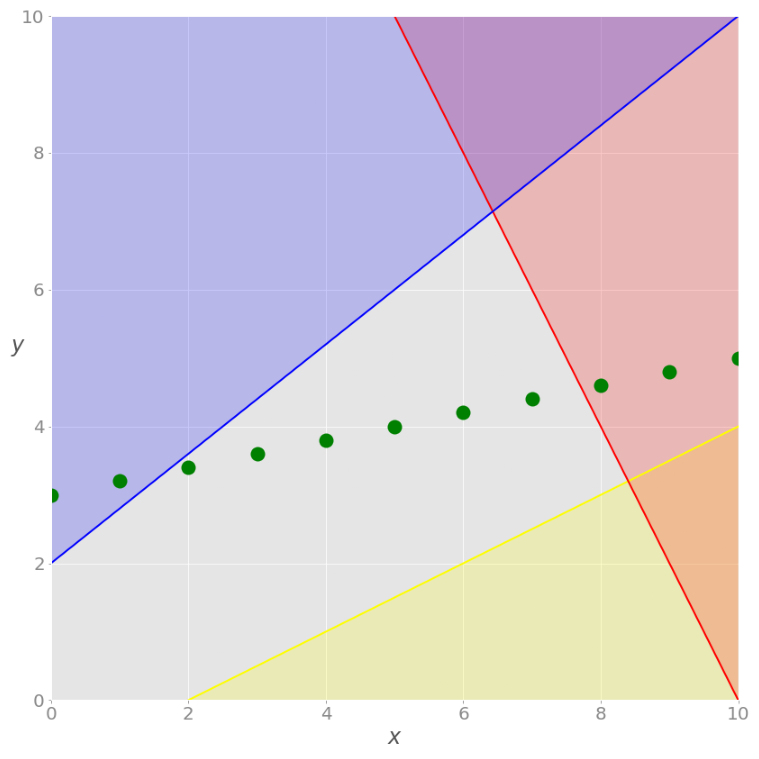

In [6]:
# if we want integer value of our variable
display_image_in_actual_size("OR_graph.png")

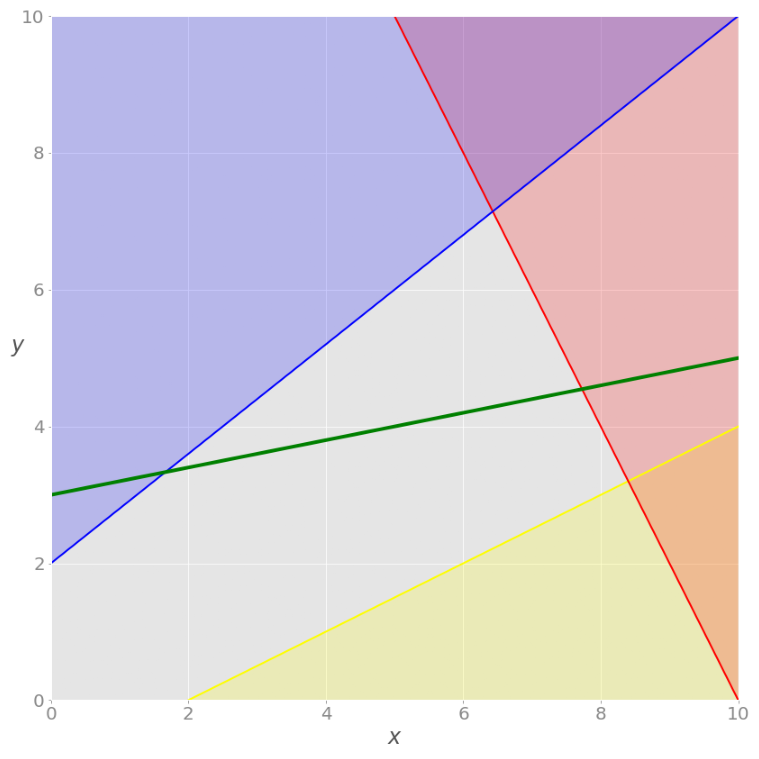

In [7]:
display_image_in_actual_size("OR_graph2.png")

In [15]:
for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

constraint1: -9.99999993922529e-08
constraint2: 18.181818300000003
constraint3: 3.3636362999999996
constraint4: -2.0000000233721948e-07


In [16]:
model.solver

In [17]:
model2=LpProblem(name="production-profit-optimization",sense=LpMaximize)

In [18]:
x1= LpVariable(name="x1", lowBound=0, cat="Integer")
x2= LpVariable(name="x2", lowBound=0, cat="Integer")
x3= LpVariable(name="x3", lowBound=0, cat="Integer")
x4= LpVariable(name="x4", lowBound=0, cat="Integer")

In [19]:
model2 += (3*x1+2*x2+x3<=100,"constraint1")
model2 += (x2+2*x3+3*x4<=90,"constraint2")
model2 += (x1+x2+x3+x4<=50,"constraint3")

In [21]:
model2 += lpSum([20*x1,12*x2,40*x3,25*x4])

In [22]:
status = model2.solve()

In [24]:
for var in model2.variables():
    print(f"{var.name}: {var.value()}")

x1: 5.0
x2: 0.0
x3: 45.0
x4: 0.0


In [26]:
model2.objective.value()

1900.0

In [27]:
for name, constraint in model2.constraints.items():
    print(f"{name}: {constraint.value()}")

constraint1: -40.0
constraint2: 0.0
constraint3: 0.0


when we take x1 a liquid or product can come in any quantity

In [31]:
model3=LpProblem(name="production-profit-optimization",sense=LpMaximize)

In [32]:
x1= LpVariable(name="x1", lowBound=0, cat="continuous")
x2= LpVariable(name="x2", lowBound=0, cat="continuous")
x3= LpVariable(name="x3", lowBound=0, cat="continuous")
x4= LpVariable(name="x4", lowBound=0, cat="continuous")

In [33]:
model3 += (3*x1+2*x2+x3<=100,"constraint1")
model3 += (x2+2*x3+3*x4<=90,"constraint2")
model3 += (x1+x2+x3+x4<=50,"constraint3")

In [34]:
model3 += lpSum([20*x1,12*x2,40*x3,25*x4])

In [35]:
status = model3.solve()

In [36]:
for var in model3.variables():
    print(f"{var.name}: {var.value()}")

x1: 5.0
x2: 0.0
x3: 45.0
x4: 0.0


In [37]:
for name, constraint in model3.constraints.items():
    print(f"{name}: {constraint.value()}")

constraint1: -40.0
constraint2: 0.0
constraint3: 0.0
